In [2]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [3]:
import pandas as pd
uns_df = pd.read_csv("Uns_df.csv")
uns_df.head()

,Order_Number,Product_Code,Product_Name,Product_Category,Customer_Code,Customer,Order Date,Quantity,Unit,Unit_Price,Total,Offer Date,Offer Time,Offer Acceptance Date,Deadline,Actual Deadline Date,Result,Unnamed: 17
0,1.0,909.AHS.S,Kasa Kanat Contası 10mm,Ahşap Doğrama Contaları,aa,a,29.06.2020,5.0,Adet,8.5,42.5,30.06.2020,01.07.2020,30.06.2020,01.07.2020,01.07.2020,Kabul,NaN
1,2.0,875.AHS.S.2C,Kasa Kanat Contası 12mm,Ahşap Doğrama Contaları,bb,b,30.06.2020,10.0,Adet,10.0,100.0,30.06.2020,30.06.2020,30.06.2020,01.07.2020,02.07.2020,İst-Kabul,NaN
2,3.0,809.AHS.S.2C,Kasa Contası,Ahşap Doğrama Contaları,yy,y,29.06.2020,10.0,Adet,12.0,120.0,29.06.2020,30.06.2020,30.06.2020,02.07.2020,02.07.2020,Kabul,NaN
3,4.0,273.10.AHS.S,Ahşap Kapı Contası - 10 mm,Ahşap Doğrama Contaları,ff,f,01.07.2020,15.0,Adet,12.0,180.0,02.07.2020,03.07.2020,04.07.2020,-,-,Red,NaN
4,5.0,273.12.AHS.S,Ahşap Kapı Contası - 12 mm,Ahşap Doğrama Contaları,ee,e,02.07.2020,10.0,Adet,15.0,150.0,03.07.2020,04.07.2020,04.07.2020,05.07.2020,-,Beklemede,NaN


In [4]:
#Customer Code
uns_df.replace("aa", "001", inplace = True)
uns_df.replace("bb", "002", inplace = True)
uns_df.replace("cc", "003", inplace = True)
uns_df.replace("dd", "004", inplace = True)
uns_df.replace("ee", "005", inplace = True)
uns_df.replace("ff", "006", inplace = True)
uns_df.replace("gg", "007", inplace = True)
uns_df.replace("hh", "008", inplace = True)
uns_df.replace("ii", "009", inplace = True)
uns_df.replace("kk", "010", inplace = True)
uns_df.replace("ll", "011", inplace = True)
uns_df.replace("mm", "012", inplace = True)
uns_df.replace("nn", "013", inplace = True)
uns_df.replace("rr", "014", inplace = True)
uns_df.replace("tt", "015", inplace = True)
uns_df.replace("ss", "016", inplace = True)
uns_df.replace("yy", "017", inplace = True)
uns_df.replace("xx", "018", inplace = True)
uns_df.replace("zz", "019", inplace = True)


#Product Code
uns_df.replace("909.AHS.S", "909", inplace = True)
uns_df.replace("875.AHS.S.2C", "875", inplace = True)
uns_df.replace("809.AHS.S.2C", "809", inplace = True)
uns_df.replace("273.10.AHS.S", "273", inplace = True)
uns_df.replace("273.12.AHS.S", "273", inplace = True)
uns_df.replace("373.SP.S.1B", "373", inplace = True)
uns_df.replace("868.ALM.S.2C", "868", inplace = True)
uns_df.replace("859.ALM.S.2C", "859", inplace = True)
uns_df.replace("858.3.ALM.S", "858", inplace = True)
uns_df.replace("853.ALM.S.IP", "853", inplace = True)
uns_df.replace("850.ALM.S", "850", inplace = True)
uns_df.replace("849.ALM.S", "849", inplace = True)
uns_df.replace("848.ALM.S", "848", inplace = True)
uns_df.replace("831.ALM.S", "831", inplace = True)
uns_df.replace("827.ALM.S", "827", inplace = True)
uns_df.replace("816.ALM.S", "816", inplace = True)
uns_df.replace("815.ALM.S", "815", inplace = True)
uns_df.replace("813.ALM.S.2C", "813", inplace = True)
uns_df.replace("811.ALM.S", "811", inplace = True)
uns_df.replace("812.ALM.S", "812", inplace = True)
uns_df.replace("831.ALM.S", "831", inplace = True)
uns_df.replace("827.ALM.S", "827", inplace = True)
uns_df.replace("816.ALM.S", "816", inplace = True)
uns_df.replace("815.ALM.S", "815", inplace = True)
uns_df.replace("811.ALM.S", "811", inplace = True)
uns_df.replace("812.ALM.S", "812", inplace = True)
uns_df.replace("790.6.ALM.S", "790", inplace = True)
uns_df.replace("786.ALM.S", "786", inplace = True)
uns_df.replace("777.ALM.S", "777", inplace = True)
uns_df.replace("766.ALM.S", "766", inplace = True)

uns_df.replace("373.SP.S.1B", "373", inplace = True)
uns_df.replace("202.ALM.S", "202", inplace = True)
uns_df.replace("190.ALM.S", "190", inplace = True)
uns_df.replace("63.ALM.S", "63", inplace = True)
uns_df.replace("812.ALM.S", "812", inplace = True)
uns_df.replace("148.ALM.S", "148", inplace = True)
uns_df.replace("163.ALM.S", "163", inplace = True)
uns_df.replace("270.ALM.S", "270", inplace = True)
uns_df.replace("116.ALM.S", "116", inplace = True)


uns_df.replace("373.SP.S.1B", "373", inplace = True)
uns_df.replace("202.ALM.S", "202", inplace = True)
uns_df.replace("190.ALM.S", "190", inplace = True)
uns_df.replace("63.ALM.S", "63", inplace = True)
uns_df.replace("812.ALM.S", "812", inplace = True)
uns_df.replace("148.ALM.S", "148", inplace = True)
uns_df.replace("163.ALM.S", "163", inplace = True)
uns_df.replace("270.ALM.S", "270", inplace = True)
uns_df.replace("116.ALM.S", "116", inplace = True)
uns_df.replace("790.5.ALM.S", "790", inplace = True)


uns_df.replace("65.ALM.S", "65", inplace = True)
uns_df.replace("64.ALM.S", "64", inplace = True)
uns_df.replace("44.ALM.S", "44", inplace = True)
uns_df.replace("42.ALM.S", "42", inplace = True)
uns_df.replace("30.ALM.S", "30", inplace = True)
uns_df.replace("351.ALM.S", "351", inplace = True)

uns_df.replace("316.ALM.S", "316", inplace = True)
uns_df.replace("322.ALM.S", "322", inplace = True)
uns_df.replace("321.ALM.S", "321", inplace = True)
uns_df.replace("103.ALM.S", "103", inplace = True)
uns_df.replace("164.ALM.S", "164", inplace = True)
uns_df.replace("145.ALM.S", "145", inplace = True)

uns_df.replace("120.ALM.S", "120", inplace = True)
uns_df.replace("115.ALM.S", "115", inplace = True)
uns_df.replace("240.6.ALM.S", "240", inplace = True)
uns_df.replace("240.5.ALM.S", "240", inplace = True)
uns_df.replace("239.4.ALM.S", "239", inplace = True)
uns_df.replace("219.4.ALM.S", "219", inplace = True)
uns_df.replace("219.3.ALM.S", "219", inplace = True)
uns_df.replace("219.2.ALM.S", "219", inplace = True)

uns_df.replace("250.ALM.S", "250", inplace = True)
uns_df.replace("249.ALM.S", "249", inplace = True)
uns_df.replace("102.ALM.S", "102", inplace = True)
uns_df.replace("247.ALM.S", "247", inplace = True)
uns_df.replace("189.ALM.S", "189", inplace = True)
uns_df.replace("246.ALM.S", "246", inplace = True)

uns_df.replace("32.ALM.S", "32", inplace = True)
uns_df.replace("31.ALM.S", "31", inplace = True)
uns_df.replace("147.ALM.S", "147", inplace = True)
uns_df.replace("73.ALM.S", "73", inplace = True)
uns_df.replace("04.3.ALM.S", "04", inplace = True)
uns_df.replace("04.4.ALM.S", "04", inplace = True)

uns_df.replace("914.CB.R.2C", "914", inplace = True)
uns_df.replace("890.CB.R.2C", "890", inplace = True)
uns_df.replace("841.CB.R.2C", "841", inplace = True)

uns_df.replace("2013 E CB", "2013", inplace = True)
uns_df.replace("2013 SASE CB", "2013", inplace = True)
uns_df.replace("841.ALM.S", "841", inplace = True)

uns_df.replace("749.8.CB.R.2C", "749", inplace = True)
uns_df.replace("718.8.CB.R.2C", "718", inplace = True)
uns_df.replace("248.ALM.S", "248", inplace = True)
uns_df.replace("04.5.ALM.S", "04", inplace = True)



#Resut
uns_df.replace("Kabul", "1", inplace = True)
uns_df.replace("İst-Kabul", "2", inplace = True)
uns_df.replace("Red", "9", inplace = True)
uns_df.replace("Beklemede", "3", inplace = True)


uns_df.head()

,Order_Number,Product_Code,Product_Name,Product_Category,Customer_Code,Customer,Order Date,Quantity,Unit,Unit_Price,Total,Offer Date,Offer Time,Offer Acceptance Date,Deadline,Actual Deadline Date,Result,Unnamed: 17
0,1.0,909,Kasa Kanat Contası 10mm,Ahşap Doğrama Contaları,001,a,29.06.2020,5.0,Adet,8.5,42.5,30.06.2020,01.07.2020,30.06.2020,01.07.2020,01.07.2020,1,NaN
1,2.0,875,Kasa Kanat Contası 12mm,Ahşap Doğrama Contaları,002,b,30.06.2020,10.0,Adet,10.0,100.0,30.06.2020,30.06.2020,30.06.2020,01.07.2020,02.07.2020,2,NaN
2,3.0,809,Kasa Contası,Ahşap Doğrama Contaları,017,y,29.06.2020,10.0,Adet,12.0,120.0,29.06.2020,30.06.2020,30.06.2020,02.07.2020,02.07.2020,1,NaN
3,4.0,273,Ahşap Kapı Contası - 10 mm,Ahşap Doğrama Contaları,006,f,01.07.2020,15.0,Adet,12.0,180.0,02.07.2020,03.07.2020,04.07.2020,-,-,9,NaN
4,5.0,273,Ahşap Kapı Contası - 12 mm,Ahşap Doğrama Contaları,005,e,02.07.2020,10.0,Adet,15.0,150.0,03.07.2020,04.07.2020,04.07.2020,05.07.2020,-,3,NaN


In [5]:
featureset = uns_df[['Order_Number', 'Product_Code', 'Customer_Code','Quantity', 'Unit_Price', 'Total', 'Result']]

In [64]:
st_df=featureset.head(80)

In [8]:
st_df[["Product_Code"]] = st_df[["Product_Code",]].astype("float")
st_df[["Result"]] = st_df[["Result",]].astype("float")
st_df[["Customer_Code"]] = st_df[["Customer_Code",]].astype("float")

Historical Clustering

In [10]:
from sklearn.preprocessing import MinMaxScaler
x = st_df.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.        , 0.41024479, 0.        , 0.1       , 0.02915952,
        0.05504587, 0.        ],
       [0.01265823, 0.39483228, 0.05555556, 0.26666667, 0.03945111,
        0.26605505, 0.125     ],
       [0.02531646, 0.36491387, 0.88888889, 0.26666667, 0.05317324,
        0.33944954, 0.        ],
       [0.03797468, 0.12194016, 0.27777778, 0.43333333, 0.05317324,
        0.55963303, 1.        ],
       [0.05063291, 0.12194016, 0.22222222, 0.26666667, 0.07375643,
        0.44954128, 0.25      ]])

<h2 id="clustering_using_skl">Clustering using scikit-learn</h2>
Lets redo it again, but this time using scikit-learn package:

In [15]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.30251903 0.94976795 ... 1.12106651 1.39176957 1.39915902]
 [0.30251903 0.         0.84658126 ... 1.14886375 1.32641142 1.33680631]
 [0.94976795 0.84658126 0.         ... 1.42242866 0.96851944 0.98353442]
 ...
 [1.12106651 1.14886375 1.42242866 ... 0.         1.10848133 1.1152107 ]
 [1.39176957 1.32641142 0.96851944 ... 1.10848133 0.         0.02657342]
 [1.39915902 1.33680631 0.98353442 ... 1.1152107  0.02657342 0.        ]]


In [16]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([1, 1, 0, 2, 1, 5, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 2, 4, 0, 0, 1, 1, 1, 1, 1, 4, 4, 4, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 0, 0])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


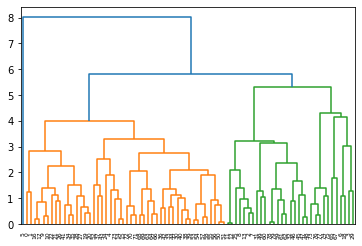

In [53]:
Z = hierarchy.linkage(dist_matrix, 'complete')
dendro = hierarchy.dendrogram(Z)

And, we can add a new field to our dataframe to show the cluster of each row:

In [18]:
st_df['cluster_'] = agglom.labels_
st_df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order_Number,Product_Code,Customer_Code,Quantity,Unit_Price,Total,Result,cluster_
0,1.0,909.0,1.0,5.0,8.5,42.5,1.0,1
1,2.0,875.0,2.0,10.0,10.0,100.0,2.0,1
2,3.0,809.0,17.0,10.0,12.0,120.0,1.0,0
3,4.0,273.0,6.0,15.0,12.0,180.0,9.0,2
4,5.0,273.0,5.0,10.0,15.0,150.0,3.0,1


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0, 0.5, 'Result')

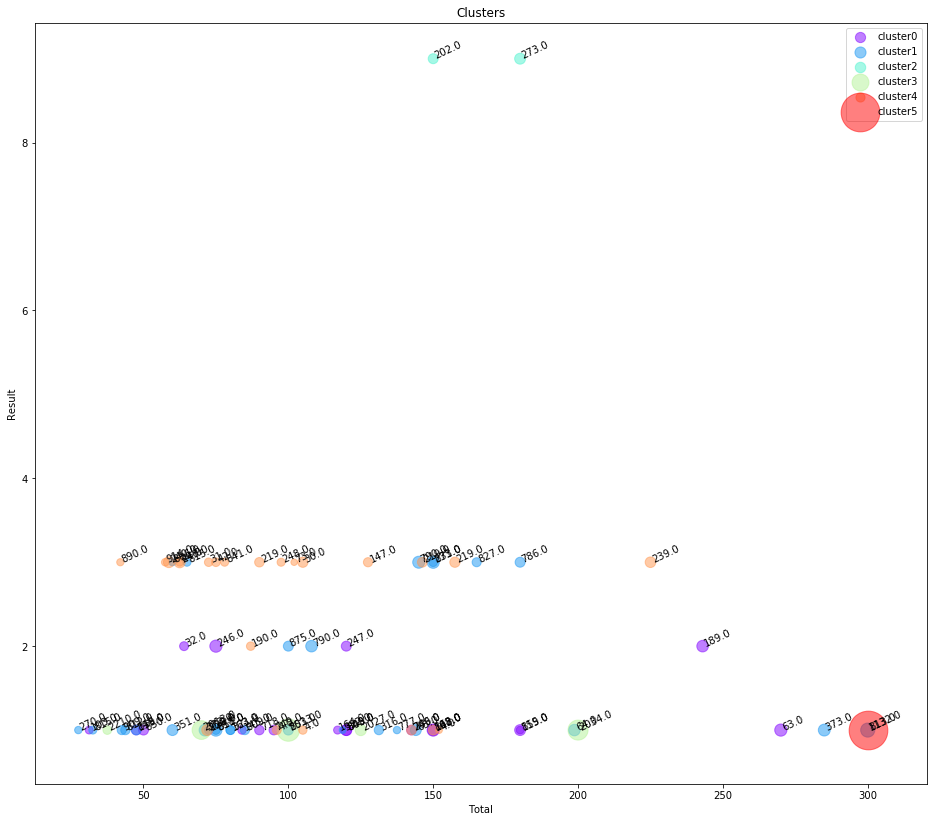

In [26]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = st_df[st_df.cluster_ == label]
    for i in subset.index:
            plt.text(subset.Total[i], subset.Result[i],str(subset['Product_Code'][i]), rotation=25) 
    plt.scatter(subset.Total, subset.Result, s= subset.Unit_Price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('Total')
plt.ylabel('Result')

In [63]:
last = st_df.groupby(['cluster_','Result','Customer_Code','Product_Code'])['Quantity','Unit_Price','Total'].mean()
last

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Quantity  Unit_Price    Total
cluster_ Result Customer_Code Product_Code                                
0        1.0    17.0          103.0          5.000000       6.250   31.250
                              115.0         30.000000       6.000  180.000
                              120.0         10.000000       7.250   72.500
                              145.0         12.000000       7.000   84.000
                              164.0         18.000000       6.500  117.000
...                                               ...         ...      ...
4        3.0    6.0           914.0         10.000000       5.750   57.500
                7.0           219.0         13.333333       9.750  131.250
                              239.0         20.000000      11.250  225.000
                              240.0          5.000000      12.125   60.625
5        1.0    6.0           1132.0         2.000000     150.000  300.000

[74 rows x 3 columns]

In [65]:
last.to_csv('testhistorical.csv')